In [1]:
import numpy as np
np.random.seed(0)
from scipy.linalg import eig
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

In [2]:
def generate_data(sample_size=100, pattern='two_cluster'):
    if pattern not in ['two_cluster', 'three_cluster']:
        raise ValueError('Dataset pattern must be one of '
                         '[two_cluster, three_cluster].')
    x = np.random.normal(size=(sample_size, 2))
    if pattern == 'two_cluster':
        x[:sample_size // 2, 0] -= 4
        x[sample_size // 2:, 0] += 4
    else:
        x[:sample_size // 4, 0] -= 4
        x[sample_size // 4:sample_size // 2, 0] += 4
        
    x = x - x.mean(axis=0)
    y = np.ones(sample_size, dtype=np.int64)
    y[sample_size // 2:] = 2
    return x, y

In [3]:
def fda(x, y, dim=1):
    
    c= list(set(y))
    if len(c) <= dim:
        raise ValueError('Dimension is too large.')
    
    mu = np.empty([len(c), x.shape[1]])
    n = np.empty([len(c)])
    for i in range(len(c)):
        mu[i] = x[y==c[i]].mean(axis=0)
        n[i] = x[y==c[i]].shape[0]

    Sb = np.zeros([len(c), len(c)])
    Sw = np.zeros([len(c), len(c)])
    for i in range(len(c)):
        Sb += n[i] * mu[i][:,np.newaxis] *mu[i][np.newaxis,]
        Sw += np.sum((x[y==c[i]] - mu[i])[:,:,np.newaxis] * (x[y==c[i]] - mu[i])[:,np.newaxis,]
                     , axis=0)

    w, v =  eig(Sb, Sw)
    ind = np.argsort(-w)
    v = v[ind]
    
    return v[:dim]

In [4]:
def visualize(x, y, T):
    plt.xlim(-7., 7.)
    plt.ylim(-7., 7.)
    plt.plot(x[y == 1, 0], x[y == 1, 1], 'bo', label='class-1')
    plt.plot(x[y == 2, 0], x[y == 2, 1], 'rx', label='class-2')
    plt.plot(np.array([-T[:, 0], T[:, 0]]) * 9,
             np.array([-T[:, 1], T[:, 1]]) * 9, 'k-')
    plt.legend()

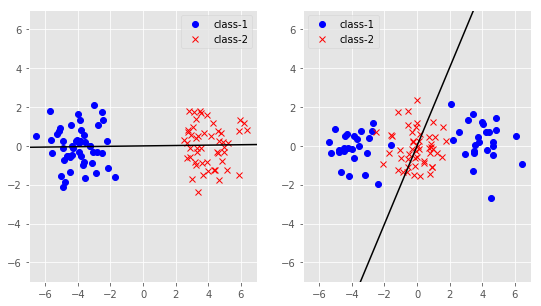

In [5]:
sample_size = 100
plt.figure(figsize=(9,5))

x, y = generate_data(sample_size=sample_size, pattern='two_cluster')
T = fda(x, y)
plt.subplot(1,2,1)
visualize(x, y, T)

x, y = generate_data(sample_size=sample_size, pattern='three_cluster')
T = fda(x, y)
plt.subplot(1,2,2)
visualize(x, y, T)